## **Reading the data**

In [1]:
# importing library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_hdf('data/nsfg.hdf5', 'nsfg')

display(data.head())
display(data.shape)

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
0,60418,1,5.0,4.0,40,1.0,2000,2075.0,22.0,3554.964843
1,60418,1,4.0,12.0,36,1.0,2291,2358.0,25.0,3554.964843
2,60418,1,5.0,4.0,36,1.0,3241,3308.0,52.0,3554.964843
3,60419,6,NaN,NaN,33,NaN,3650,NaN,NaN,2484.535358
4,60420,1,8.0,13.0,41,1.0,2191,2266.0,24.0,2903.782914


(9358, 10)

## **Data Validation**

#### When we deal with data validation, function like ```value_counts()```, ```sort_index()``` and ```describe()``` are really useful.

#### And the ```.info()``` function also worth to join.

In [2]:
display(data.describe())

,caseid,outcome,birthwgt_lb1,birthwgt_oz1,prglngth,nbrnaliv,agecon,agepreg,hpagelb,wgt2013_2015
count,9358.000000,9358.000000,6485.000000,6391.000000,9358.000000,6485.000000,9358.000000,9109.000000,6485.000000,9358.000000
mean,65502.392605,1.773990,8.055204,7.213895,29.896345,1.018042,2446.330199,2494.934570,28.992136,10759.200147
std,2953.471315,1.348648,11.178893,8.254885,13.685389,0.160433,579.392363,578.099231,10.367124,11400.179222
min,60418.000000,1.000000,0.000000,0.000000,0.000000,1.000000,750.000000,825.000000,5.000000,1859.105000
25%,62875.750000,1.000000,6.000000,3.000000,14.000000,1.000000,1983.000000,2041.000000,23.000000,4340.053407
50%,65499.000000,1.000000,7.000000,6.000000,38.000000,1.000000,2366.000000,2416.000000,27.000000,7062.994158
75%,68111.000000,2.000000,8.000000,11.000000,39.000000,1.000000,2850.000000,2900.000000,33.000000,12629.322982
max,70619.000000,6.000000,99.000000,99.000000,48.000000,8.000000,4350.000000,4350.000000,99.000000,75399.410000


## **Cleaning Data**

In [3]:
# Assigning values to pound and ounces variables
pound = data['birthwgt_lb1']
ounces = data['birthwgt_oz1']

#### By looking at the values, we can easily determined that the ```99.00 & 98.00``` are some invalid entities.

In [4]:
print(pound.value_counts().sort_index())
print('\n')
print(ounces.value_counts().sort_index())

0.0        6
1.0       34
2.0       47
3.0       67
4.0      196
5.0      586
6.0     1666
7.0     2146
8.0     1168
9.0      363
10.0      82
11.0      17
12.0       7
13.0       2
14.0       2
17.0       1
98.0       1
99.0      94
Name: birthwgt_lb1, dtype: int64


0.0     757
1.0     297
2.0     429
3.0     393
4.0     386
5.0     407
6.0     543
7.0     346
8.0     518
9.0     377
10.0    295
11.0    418
12.0    388
13.0    275
14.0    258
15.0    268
98.0      1
99.0     35
Name: birthwgt_oz1, dtype: int64


#### We will replace the invalid entity with ```np.nan```  and also we won't take any copy of it. So, we will make ```inplace=True``` in ```replace()``` method.

In [5]:
pound = pound.replace([99.00, 98.00], np.nan)
ounces = ounces.replace([99.00, 98.00], np.nan)

### **Dealing with data types.**

#### The variable 'agecon' encodes the respondent's age at conception, and 'agepreg' the respondent's age at the end of the pregnancy. Both variables are recorded as integers with two implicit decimal places, so the value 2575 means that the respondent's age was 25.75.
#### So, we need to change them to their right form.

In [6]:
agecon = data['agecon']/100
agepreg = data['agepreg']/100

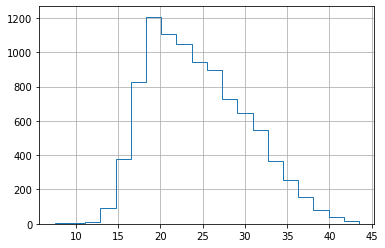

In [7]:
agecon.hist(bins=20, histtype='step')
plt.show()

### **Mean for full-term babies.**

In [8]:
birth_weight = pound + ounces/16

# Create a Boolean Series for full-term babies
full_term = data['prglngth'] >= 37
# print(full_term)

# # # Select the weights of full-term babies
full_term_weight = birth_weight[full_term]

# # # Compute the mean weight of full-term babies
print(full_term_weight.mean())

7.372323879231473


### **Mean for full-term Single and Multiple babies.**

In [9]:
# Filter full-term babies
full_term = data['prglngth'] >= 37

# Filter single births
single = data['nbrnaliv'] == 1

# Compute birth weight for single full-term babies
single_full_term_weight = birth_weight[full_term & single]
print('Single full-term mean:', single_full_term_weight.mean())

# Compute birth weight for multiple full-term babies
mult_full_term_weight = birth_weight[ full_term & ~single]
print('Multiple full-term mean:', mult_full_term_weight.mean())

Single full-term mean: 7.385643450184502
Multiple full-term mean: 5.768055555555556


## **Do people tend to gain weight as they get older?**

In [10]:
# Reading the data
data = pd.read_hdf('data/gss.hdf5', 'gss')

display(data.head())

,year,age,cohort,sex,race,educ,realinc,gunlaw,grass,wtssall
0,1972,26.0,1946.0,1,1,18.0,13537.0,2.0,NaN,0.8893
1,1972,38.0,1934.0,2,1,12.0,18951.0,1.0,NaN,0.4446
2,1972,57.0,1915.0,1,1,12.0,30458.0,1.0,NaN,1.3339
3,1972,61.0,1911.0,2,1,14.0,37226.0,1.0,NaN,0.8893
4,1972,59.0,1913.0,1,1,12.0,30458.0,2.0,NaN,0.8893


## **PMF(Probability Mass Function)**

### PMF tells you
>#### if you draw a random value from a distribution - what's the chance of getting x, for any given value of x.


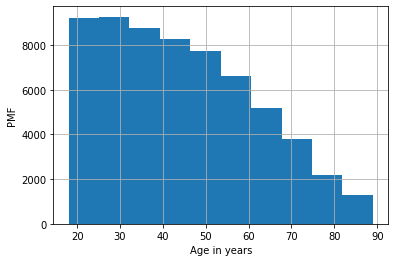

In [12]:
from empiricaldist import Pmf

# Extract age
age = data['age']

# Plot the PMF
pmf_age = Pmf(age)
# pmf_age.bar()
pmf_age.hist()

# # Label the axes
plt.xlabel('Age in years')
plt.ylabel('PMF')
plt.show()

#### In other words what is percentage of Distribution present in the particular Region.**Take between 20-30 There are around over 8000 distribution present.**

### The CDF is similar
>#### if you draw a random value from a distribution, it tells you the chance of getting a value less than or equal to x.

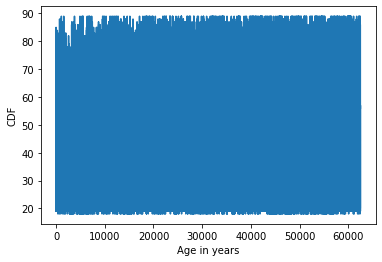

In [13]:
from empiricaldist import Cdf

# Extract age
age = data['age']

# Plot the PMF
cdf_age = Cdf(age)
# pmf_age.bar()
plt.plot(cdf_age)

# # Label the axes
plt.xlabel('Age in years')
plt.ylabel('CDF')
plt.show()

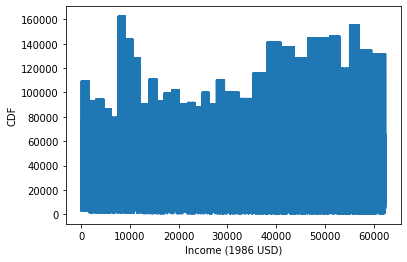

In [14]:
# Select realinc
income = data['realinc']

# Make the CDF
cdf_income = Cdf(income)

# Plot it
cdf_income.plot()

# Label the axes
plt.xlabel('Income (1986 USD)')
plt.ylabel('CDF')
plt.show()

## **Calculating IQR using CDF**

In [16]:
income = data['realinc']

# Make the CDF
cdf_income = Cdf(income)
# print(cdf_income)

# Calculate the 75th percentile 
percentile_75th = cdf_income.inverse(.75) 
# print(percentile_75th)

# Calculate the 25th percentile
percentile_25th = cdf_income.inverse(0.25)

# Calculate the interquartile range
iqr =  percentile_75th - percentile_25th

# Print the interquartile range
print(iqr)


0.0


### Creating Boolean values

In [17]:
educ = data['educ']

assc = (educ >= 14) & (educ < 16)


## **Visualizing Relationships**

In [20]:
brfss = pd.read_hdf('data/brfss.hdf5')
display(brfss.head())

,SEX,HTM4,WTKG3,INCOME2,_LLCPWT,_AGEG5YR,_VEGESU1,_HTMG10,AGE
96230,2.0,160.0,60.33,8.0,1398.525290,6.0,2.14,150.0,47.0
244920,2.0,163.0,58.97,5.0,84.057503,13.0,3.14,160.0,89.5
57312,2.0,163.0,72.57,8.0,390.248599,5.0,2.64,160.0,42.0
32573,2.0,165.0,74.84,1.0,11566.705300,3.0,1.46,160.0,32.0
355929,2.0,170.0,108.86,3.0,844.485450,3.0,1.81,160.0,32.0


In [30]:
import seaborn as sns
plt.style.use('ggplot')

plt.subplot(figsize=(12, 5))

# Drop rows with missing data
data = brfss.dropna(subset=['_HTMG10', 'WTKG3'])

# Make a box plot
sns.boxplot(x='_HTMG10',y='WTKG3', data=data, whis=10 )

# Plot the y-axis on a log scale
plt.yscale('log')

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Height in cm')
plt.ylabel('Weight in kg')
plt.show()


AttributeError: 'AxesSubplot' object has no property 'figsize'

<Figure size 432x288 with 0 Axes>

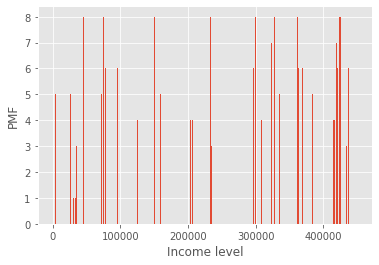

In [27]:
# Extract income
income = brfss['INCOME2']

# Plot the PMF
Pmf(income).bar()

# Label the axes
plt.xlabel('Income level')
plt.ylabel('PMF')
plt.show()

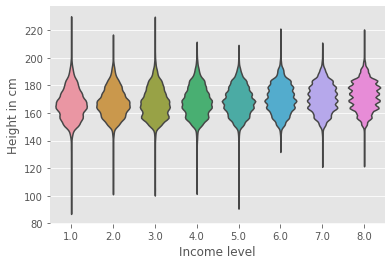

In [28]:
# Drop rows with missing data
data = brfss.dropna(subset=['INCOME2', 'HTM4'])

# Make a violin plot
sns.violinplot(x='INCOME2', y='HTM4', data=data, inner=None)

# Remove unneeded lines and label axes
sns.despine(left=True, bottom=True)
plt.xlabel('Income level')
plt.ylabel('Height in cm')
plt.show()

## **Regression is not causation**